# TCYLAFT6 Xija Model Fit Notebook

## Package Imports

### Standard Packages

In [1]:
import urllib
import json
from os.path import expanduser
import sys
import cPickle as pickle

### Ska Packages

In [3]:
from Ska.engarchive import fetch_eng as fetch
from xijafit import *

### Local Packages

In [3]:
home = expanduser("~")
addthispath = home + '/AXAFLIB/fot_bad_intervals/'
sys.path.append(addthispath)
from fot_bad_intervals import get_keep_ind
import dashboard as dash

### Local Notebook Settings

In [4]:
from matplotlib import rcParams, rc, font_manager
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
# rcParams['axes.facecolor'] = [.1,.15,.2]
%matplotlib notebook
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

## Fit Process

In [ ]:
newmodel = XijaFit('tcylaft6_model_spec_roll_base.json', set_data_exprs=(u'tcylaft6_0=22.0',), start='2013:300', stop='2016:300',
                   quiet=False, name='tcylaft6')

newmodel.freeze_all()
newmodel.thaw_solarheat_p()
newmodel.thaw_solarheat_roll()
newmodel.thaw_param(u'coupling__tcylaft6__tcylaft6_0__tau')
newmodel.thaw_param(u'solarheat__tcylaft6_0__ampl')
newmodel.fit(method='moncar')

newmodel.freeze_all()
newmodel.thaw_param(u'heatsink__tcylaft6_0__T')
newmodel.thaw_param(u'heatsink__tcylaft6_0__tau')
newmodel.fit(method='moncar')

newmodel.freeze_all()
newmodel.set_range('solarheat__tcylaft6_0__dP_45', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_60', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_80', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_90', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_100', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_110', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_120', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_130', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_140', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_150', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_160', -0.5, 0.5)
newmodel.set_range('solarheat__tcylaft6_0__dP_180', -0.5, 0.5)
newmodel.thaw_solarheat_dp()
newmodel.thaw_param(u'solarheat__tcylaft6_0__ampl')
newmodel.fit(method='moncar')

newmodel.update_fit_times(start='2013:300', stop='2016:300')

newmodel.freeze_all()
newmodel.thaw_solarheat_p()
newmodel.thaw_solarheat_roll()
newmodel.thaw_param(u'coupling__tcylaft6__tcylaft6_0__tau')
newmodel.fit(method='moncar')

newmodel.freeze_all()
newmodel.thaw_solarheat_dp()
newmodel.fit(method='moncar')

newmodel.write_spec_file()
newmodel.write_snapshots_file('tcylaft6_fit_snapshots.json')

## Show how the fit improved

In [6]:
newmodel = XijaFit('tcylaft6_model_spec.json', set_data_exprs=(u'tcylaft6_0=22.0',), start='2013:300', stop='2016:300',
                   quiet=False, name='tcylaft6', snapshotfile='tcylaft6_fit_snapshots.json')

Fetching msid: tcylaft6 over 2013:300:11:37:12.816 to 2016:300:12:20:47.816
Fetching msid: pitch over 2013:300:11:37:12.816 to 2016:300:12:20:47.816
Fetching msid: aoeclips over 2013:300:11:37:12.816 to 2016:300:12:20:47.816
Fetching msid: roll over 2013:300:11:37:12.816 to 2016:300:12:20:47.816


The fit statistic is normalized by time to acommodate different fit durations.

In [7]:
fitstats = [snapshot['fit_stat']/(DateTime(snapshot['tstop']).secs - DateTime(snapshot['tstart']).secs)
            for snapshot in newmodel.snapshots]

<IPython.core.display.Javascript object>


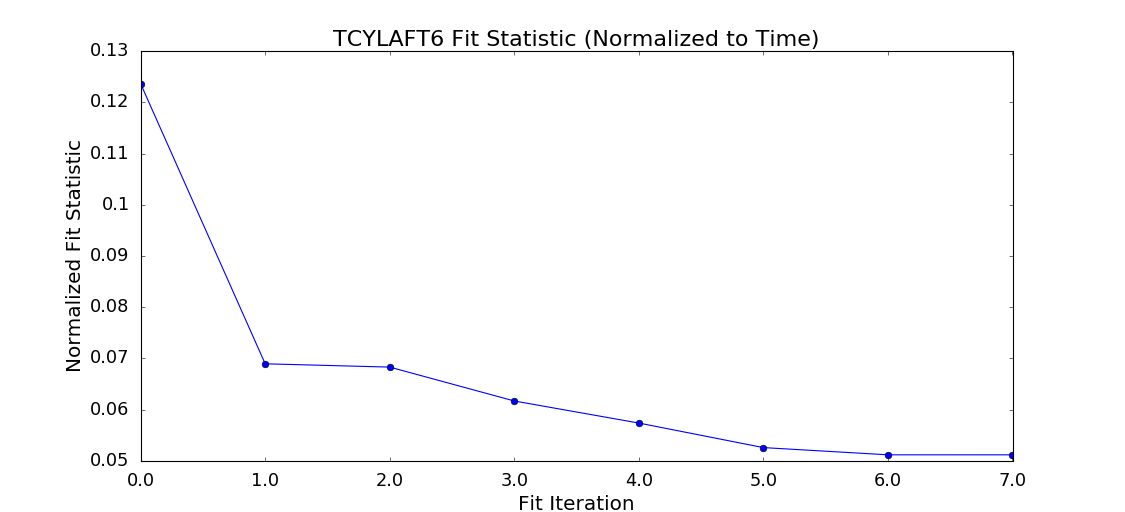

In [26]:
fig = plt.figure()
plt.plot(fitstats, marker='o')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.set_title('TCYLAFT6 Fit Statistic (Normalized to Time)', fontsize=20)
ax.set_xlabel('Fit Iteration', fontsize=18)
ax.set_ylabel('Normalized Fit Statistic', fontsize=18)

## Show Parameter Characteristics and Comparison to Telemetry

This includes interactive controls to modify and explore the model. Any modification using this GUI affects the global state of the model in memory, so care should be taken to ensure one does not overwrite a good fit.

Fetching msid: tcylaft6 over 2016:080:11:32:47.816 to 2016:280:12:16:55.816
Fetching msid: pitch over 2016:080:11:32:47.816 to 2016:280:12:16:55.816
Fetching msid: aoeclips over 2016:080:11:32:47.816 to 2016:280:12:16:55.816
Fetching msid: roll over 2016:080:11:32:47.816 to 2016:280:12:16:55.816
Updated model component solarheat__tcylaft6_0 epoch from 2015:117 to 2016:180
Updated model component solarheat__tcylaft6_0 epoch from 2016:180 to 2015:117
Fetching msid: tcylaft6 over 2013:300:11:37:12.816 to 2016:300:12:20:47.816
Fetching msid: pitch over 2013:300:11:37:12.816 to 2016:300:12:20:47.816
Fetching msid: aoeclips over 2013:300:11:37:12.816 to 2016:300:12:20:47.816
Fetching msid: roll over 2013:300:11:37:12.816 to 2016:300:12:20:47.816


<IPython.core.display.Javascript object>


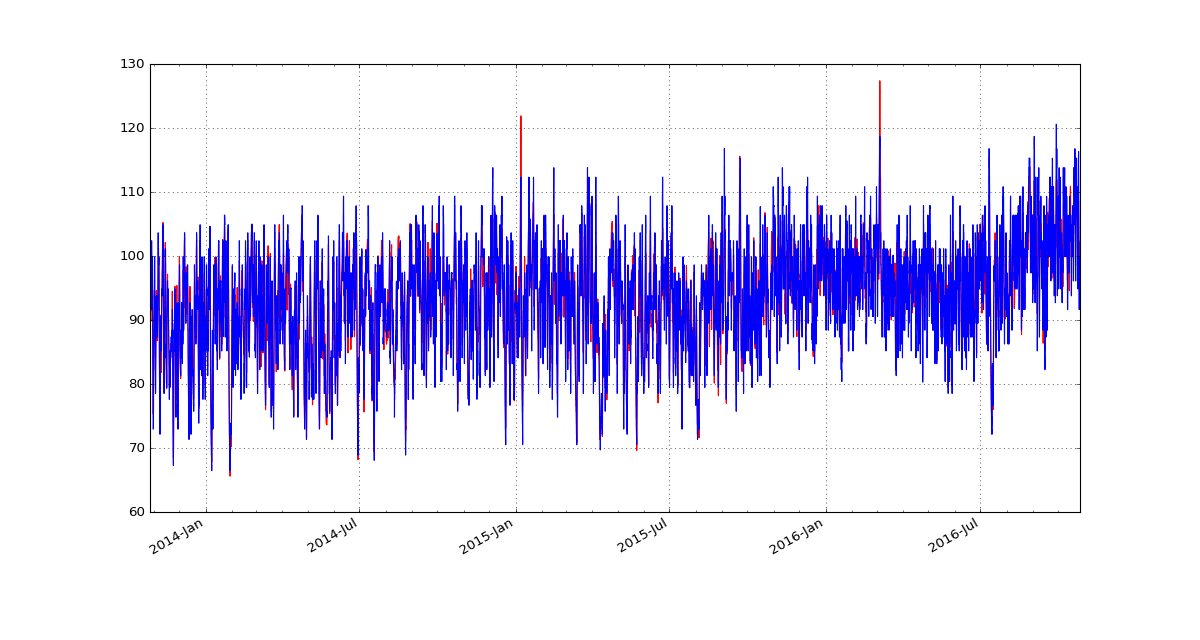

In [9]:
newmodel = XijaFit('tcylaft6_model_spec.json', set_data_exprs=(u'tcylaft6_0=22.0',), stop='2016:280', start='2016:080',
                   quiet=False, name='tcylaft6')
newmodel.update_fit_times(start='2013:300', stop='2016:300')
XijaParamGui(newmodel, 'tcylaft6')

## New Model Dashboard

<IPython.core.display.Javascript object>


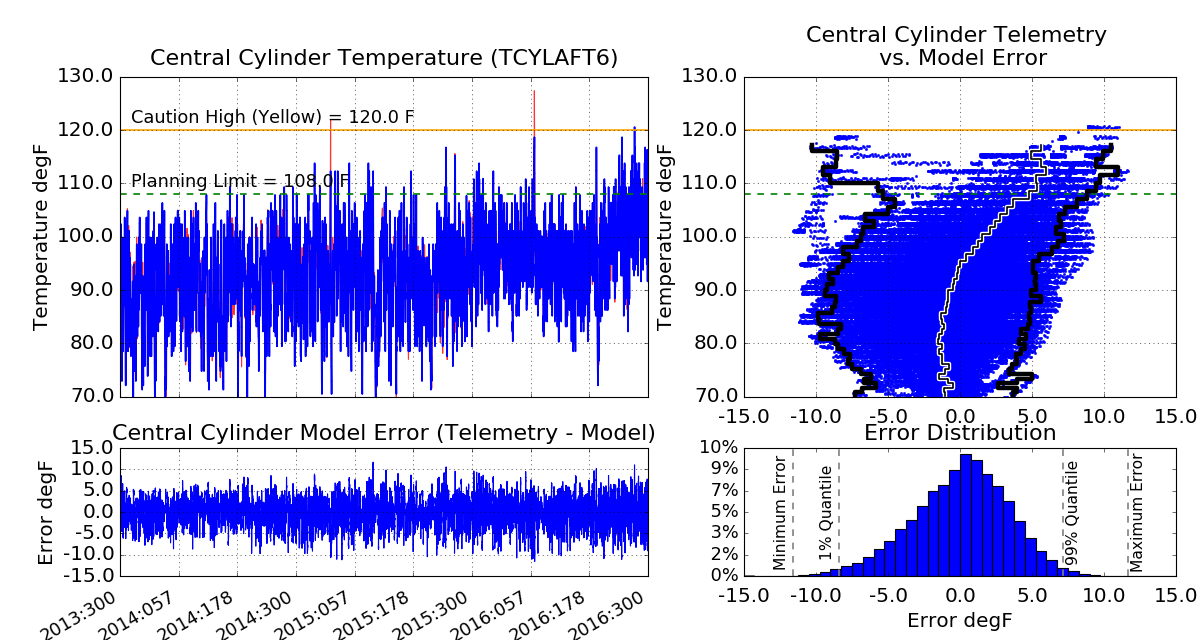

In [11]:
modelspec = newmodel.model_spec
msid = 'tcylaft6'
msiddata = newmodel.model.get_comp(msid)
prediction = msiddata.mvals * 9. / 5. + 32.
telem = msiddata.dvals * 9. / 5. + 32.
times = msiddata.times
keep = get_keep_ind(times, 'spacecraft', msid, '5min')
modellimits = {'units': 'F', 'caution_high': 120.0, 'planning_limit': 108.0}
dash.dashboard(prediction[keep], telem[keep], times[keep], modellimits, modelname='Central Cylinder', msid='tcylaft6',
               errorplotlimits=[-15, 15], yplotlimits=[70, 130])

## Current Flight Model Dashboard

Fetching msid: tcylaft6 over 2013:300:11:37:12.816 to 2016:300:12:20:47.816
Fetching msid: pitch over 2013:300:11:37:12.816 to 2016:300:12:20:47.816
Fetching msid: aoeclips over 2013:300:11:37:12.816 to 2016:300:12:20:47.816
Updated model component solarheat__tcylaft6_0 epoch from 2013:182 to 2015:117


dashboard.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q99 = esort[0.99 * len(esort) - 1]
dashboard.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q95 = esort[0.95 * len(esort) - 1]
dashboard.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q84 = esort[0.84 * len(esort) - 1]
dashboard.py:49: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q16 = esort[0.16 * len(esort) - 1]
dashboard.py:50: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q05 = esort[0.05 * len(esort) - 1]
dashboard.py:51: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  q01 = esort[0.01 * len(esor

<IPython.core.display.Javascript object>


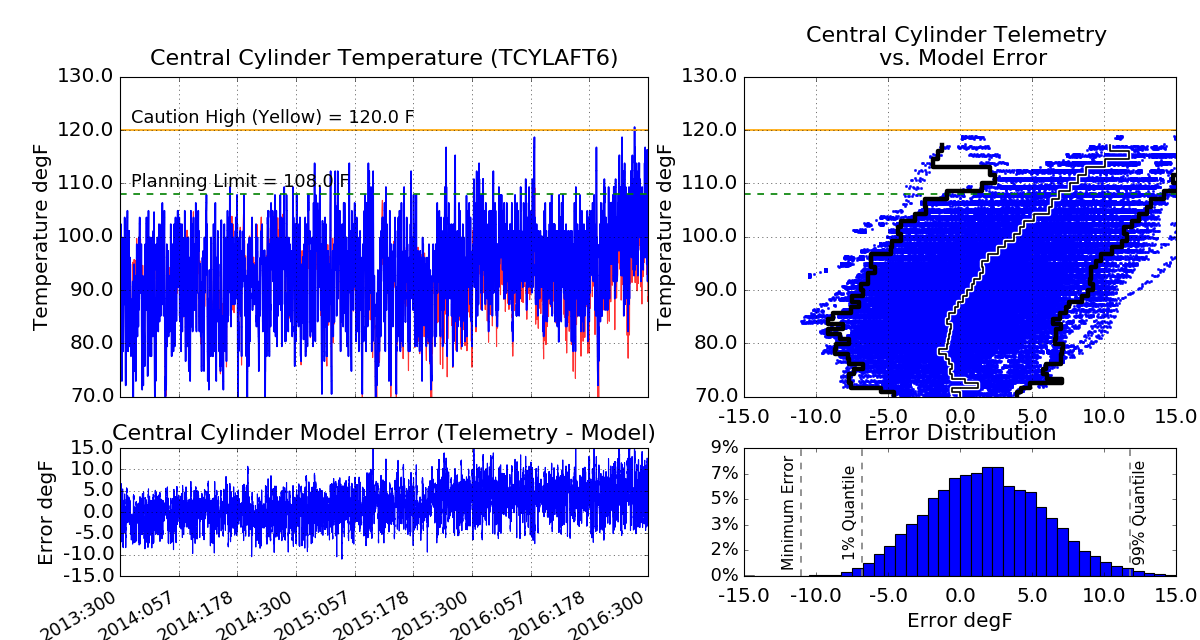

In [6]:
model_spec_url = 'https://raw.githubusercontent.com/sot/chandra_models/master/chandra_models/xija/tcylaft6/tcylaft6_spec.json'
response = urllib.urlopen(model_spec_url)
model_spec = json.loads(response.read())
msid = 'tcylaft6'

oldmodel = XijaFit(model_spec, set_data_exprs=(u'tcylaft6_0=22.0',), quiet=False, name='tcylaft6',start='2013:300', stop='2016:300')
msiddata = oldmodel.model.get_comp(msid)
prediction = msiddata.mvals * 9. / 5. + 32.
telem = msiddata.dvals * 9. / 5. + 32.
times = msiddata.times
keep = get_keep_ind(times, 'spacecraft', msid, '5min')
modellimits = {'units': 'F', 'caution_high': 120.0, 'planning_limit': 108.0}
dash.dashboard(prediction[keep], telem[keep], times[keep], modellimits, modelname='Central Cylinder', msid='tcylaft6',
               errorplotlimits=[-15, 15], yplotlimits=[70, 130])


## Pyger Plots 

These will only work (probably) if you have the right files in the right places.

### Standard Composite Plot

In [5]:
from plotcomposite import *

Imported info for 1DEAMZT
Imported info for PFTANK2T
Imported info for 4RT700T
Imported info for 1DPAMZT
Imported info for 1PDEAAT
Imported info for AACCCDPT
Imported info for TCYLAFT6
Imported info for 1DEAMZT
Imported info for PFTANK2T
Imported info for 4RT700T
Imported info for 1DPAMZT
Imported info for 1PDEAAT
Imported info for AACCCDPT
Imported info for TCYLAFT6


<IPython.core.display.Javascript object>


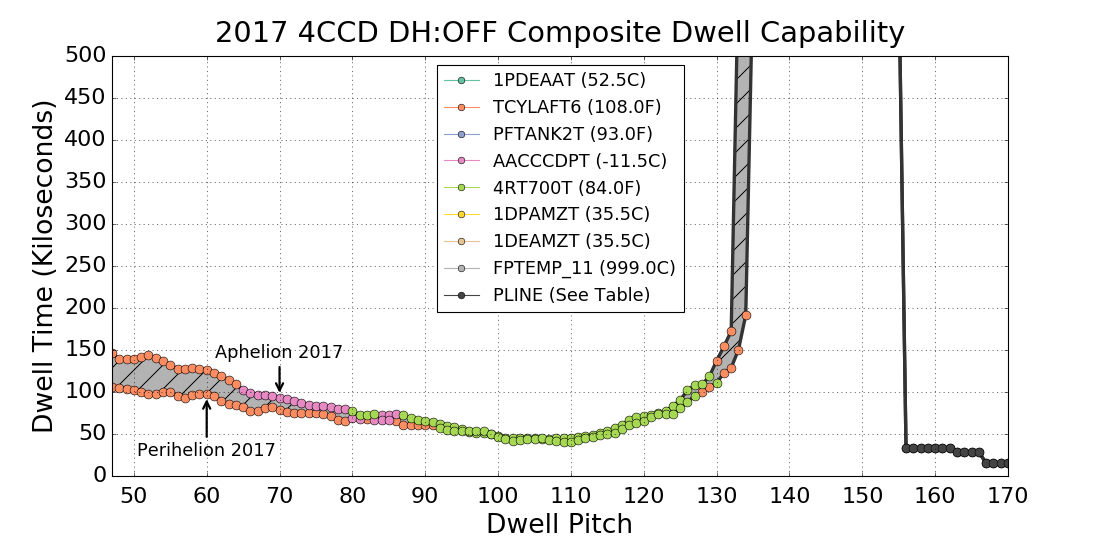

In [14]:
n_sim = 2000
max_dwell_ksec = 700
dwell_2_pitch_num = 200

options = {'TCYLAFT6': {'units': 'F', 'startlim': 108, 'stoplim': 108, 'limstep': 1,
                        'nccd1': [4, ], 'dh': ['OFF', ], 'model': 'tcylaft6', 'sameccd': True, 'roll': 0.0},
           'PFTANK2T': {'units': 'F', 'startlim': 93, 'stoplim': 93, 'limstep': 1,
                        'nccd1': [4, ], 'dh': ['OFF', ], 'model': 'tank', 'sameccd': True, 'roll': 0.0},
           'AACCCDPT': {'units': 'C', 'startlim': -11.5, 'stoplim': -11.5, 'limstep': 1,
                        'nccd1': [4, ], 'dh': ['ON', ], 'model': 'aca', 'sameccd': True, 'roll': 0.0},
           '4RT700T': {'units': 'F', 'startlim': 84, 'stoplim': 84, 'limstep': 1,
                       'nccd1': [4, ], 'dh': ['ON', ], 'model': 'fwdblkhd', 'sameccd': True, 'roll': 0.0},
           '1PDEAAT': {'units': 'C', 'startlim': 52.5, 'stoplim': 52.5, 'limstep': 0.5,
                       'nccd1': [4, ], 'dh': ['OFF', ], 'model': 'psmc', 'sameccd': True, 'roll': 0.0},
           '1DPAMZT': {'units': 'C', 'startlim': 35.5, 'stoplim': 35.5, 'limstep': 0.5,
                       'nccd1': [4, ], 'dh': ['OFF', ], 'model': 'dpa', 'sameccd': True, 'roll': 0.0},
           '1DEAMZT': {'units': 'C', 'startlim': 35.5, 'stoplim': 35.5, 'limstep': 0.5,
                       'nccd1': [4, ], 'dh': ['OFF', ], 'model': 'dea', 'sameccd': True, 'roll': 0.0}}

dates = [year + ':' + day for day in ['001', ] for year in ['2017', ]]
cases_perihelion = assemble_cases(options, n_sim, max_dwell_ksec, dwell_2_pitch_num, dates)

dates = [year + ':' + day for day in ['182', ] for year in ['2017', ]]
cases_aphelion = assemble_cases(options, n_sim, max_dwell_ksec, dwell_2_pitch_num, dates)

post_perihelion = pyger.PostPyger(cases_perihelion, home + '/AXAFLIB/xijafit/pygerdata/')
post_aphelion = pyger.PostPyger(cases_aphelion, home + '/AXAFLIB/xijafit/pygerdata/')

gen_composite_plot(post_aphelion, post_perihelion, extra_text='', maxy=500000, saveimage=False)


### Dwell Capability Comparison Plot

<IPython.core.display.Javascript object>


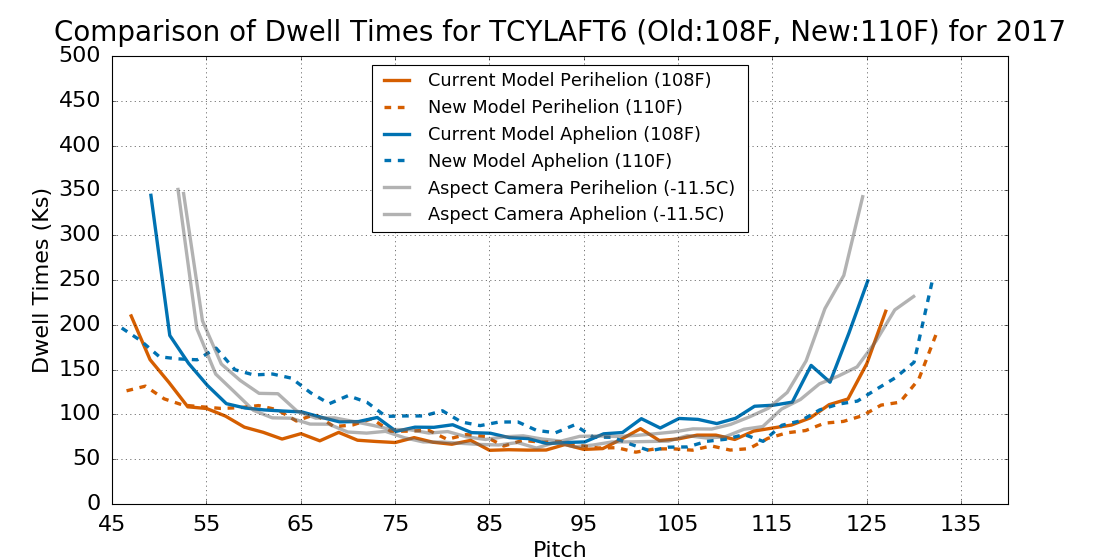

In [24]:

rcParams['xtick.major.pad'] = 10
rcParams['ytick.major.pad'] = 10
rc('font', family='sans-serif') 
rc('font', weight='light')
lightfont = font_manager.FontProperties(weight='light')
_, _, hot_cc_108_prod_ph = pickle.load(open(
        home + '/AXAFLIB/xijafit/pygerdata/pyger_single_msid_2017001_tcylaft6_108_4ccd-4ccd_DH-ON_roll-0.0_dwell2.pkl', 'rb'))
_, _, hot_cc_110_new_ph = pickle.load(open(
        home + '/AXAFLIB/xijafit/pygerdata/pyger_single_msid_2017001_tcylaft6_110_4ccd-4ccd_DH-OFF_roll-0.0_dwell2.pkl', 'rb'))

_, _, hot_cc_108_prod_ap = pickle.load(open(
        home + '/AXAFLIB/xijafit//pygerdata/pyger_single_msid_2017182_tcylaft6_108_4ccd-4ccd_DH-ON_roll-0.0_dwell2.pkl', 'rb'))
_, _, hot_cc_110_new_ap = pickle.load(open(
        home + '/AXAFLIB/xijafit/pygerdata/pyger_single_msid_2017182_tcylaft6_110_4ccd-4ccd_DH-OFF_roll-0.0_dwell2.pkl', 'rb'))

_, _, hot_ac_108_prod_ph = pickle.load(open(
        home + '/AXAFLIB/xijafit/pygerdata/pyger_single_msid_2017001_aacccdpt_-11.5_4ccd-4ccd_DH-ON_roll-0.0_dwell2.pkl', 'rb'))
_, _, hot_ac_108_prod_ap = pickle.load(open(
        home + '/AXAFLIB/xijafit/pygerdata/pyger_single_msid_2017182_aacccdpt_-11.5_4ccd-4ccd_DH-ON_roll-0.0_dwell2.pkl', 'rb'))

fig = plt.figure(figsize=[14, 7], facecolor='white')
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.plot(hot_cc_108_prod_ph['tcylaft6']['pitch'], hot_cc_108_prod_ph['tcylaft6']['dwell1_duration'], 
        color='#D55E00', linewidth=3, label='Current Model Perihelion (108F)')
ax.plot(hot_cc_110_new_ph['tcylaft6']['pitch'], hot_cc_110_new_ph['tcylaft6']['dwell1_duration'],  '--', 
        color='#D55E00', linewidth=3, label='New Model Perihelion (110F)')
ax.plot(hot_cc_108_prod_ap['tcylaft6']['pitch'], hot_cc_108_prod_ap['tcylaft6']['dwell1_duration'], 
        color='#0072B2', linewidth=3, label='Current Model Aphelion (108F)')
ax.plot(hot_cc_110_new_ap['tcylaft6']['pitch'], hot_cc_110_new_ap['tcylaft6']['dwell1_duration'],  '--', 
        color='#0072B2', linewidth=3, label='New Model Aphelion (110F)')

ax.plot(hot_ac_108_prod_ph['aacccdpt']['pitch'], hot_ac_108_prod_ph['aacccdpt']['dwell1_duration'], 
        color=[0.4, 0.4, 0.4], linewidth=3, label='Aspect Camera Perihelion (-11.5C) ', alpha=0.5)
ax.plot(hot_ac_108_prod_ap['aacccdpt']['pitch'], hot_ac_108_prod_ap['aacccdpt']['dwell1_duration'], 
        color=[0.4, 0.4, 0.4], linewidth=3, label='Aspect Camera Aphelion (-11.5C) ', alpha=0.5)

ax.legend(loc='upper center', fontsize=16)
ax.set_title('Comparison of Dwell Times for TCYLAFT6 (Old:108F, New:110F) for 2017', fontsize=25, y=1.02, fontproperties=lightfont)
ax.set_ylabel('Dwell Times (Ks)',fontsize=20, fontproperties=lightfont)
ax.set_xlabel('Pitch',fontsize=20, fontproperties=lightfont)
ax.set_xticks(range(45, 175, 10))
ax.set_yticks(range(0, 550000, 50000))
ax.set_yticklabels([y/1000 for y in ax.get_yticks()], fontsize=20)
ax.set_xticklabels(ax.get_xticks(), fontsize=20)
ax.set_xlim(45, 140)
ax.set_ylim(0, 500100)
ax.grid(True)
# fig.savefig('Pyger_Dwell_Time_Comparison_New_vs_Current_TCYLAFT6_108F_2017.png')